# Week 1 – Exploratory Data Analysis (EDA)
## Project: FactoryGuard AI – Predictive Maintenance


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("../data/processed/train.csv")
df.head()


,timestamp,temperature,vibration,pressure,failure,hour,day,day_of_week,month,temp_mean_5,...,press_ema_8,temp_roll_mean_16,vib_roll_mean_16,press_roll_mean_16,temp_roll_std_16,vib_roll_std_16,press_roll_std_16,temp_ema_16,vib_ema_16,press_ema_16
0,2025-01-01 00:44:00,70.996682,0.503573,5.759326,0,0,1,2,1,68.256394,...,6.166411,68.966080,0.491044,6.136589,1.929968,0.119562,0.323587,68.920480,0.495926,6.176933
1,2025-01-01 00:45:00,70.948385,0.588490,6.345033,0,0,1,2,1,68.263762,...,6.206105,69.034948,0.505531,6.146406,1.982425,0.116193,0.327607,69.159057,0.506816,6.196709
2,2025-01-01 00:46:00,70.011625,0.568472,5.990065,0,0,1,2,1,69.190317,...,6.158096,69.006720,0.514981,6.144097,1.963861,0.114675,0.328634,69.259359,0.514070,6.172398
3,2025-01-01 00:47:00,69.600522,0.469315,5.926094,0,0,1,2,1,69.497425,...,6.106540,69.108757,0.518912,6.141832,1.948643,0.111747,0.330092,69.299496,0.508805,6.143421
4,2025-01-01 00:48:00,67.259422,0.407947,5.666269,0,0,1,2,1,69.763327,...,6.008702,69.005533,0.513705,6.151534,2.002808,0.115014,0.312106,69.059487,0.496939,6.087286


In [6]:
df.shape


(412, 40)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           412 non-null    object 
 1   temperature         412 non-null    float64
 2   vibration           412 non-null    float64
 3   pressure            412 non-null    float64
 4   failure             412 non-null    int64  
 5   hour                412 non-null    int64  
 6   day                 412 non-null    int64  
 7   day_of_week         412 non-null    int64  
 8   month               412 non-null    int64  
 9   temp_mean_5         412 non-null    float64
 10  vib_std_10          412 non-null    float64
 11  pressure_max_30     412 non-null    float64
 12  failure_future      412 non-null    float64
 13  temp_roll_mean_4    412 non-null    float64
 14  vib_roll_mean_4     412 non-null    float64
 15  press_roll_mean_4   412 non-null    float64
 16  temp_rol

In [8]:
df['failure'].value_counts()


failure
0    399
1     13
Name: count, dtype: int64

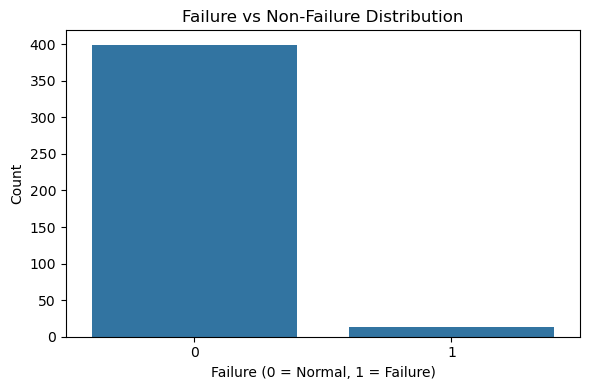

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='failure', data=df)
plt.title("Failure vs Non-Failure Distribution")
plt.xlabel("Failure (0 = Normal, 1 = Failure)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


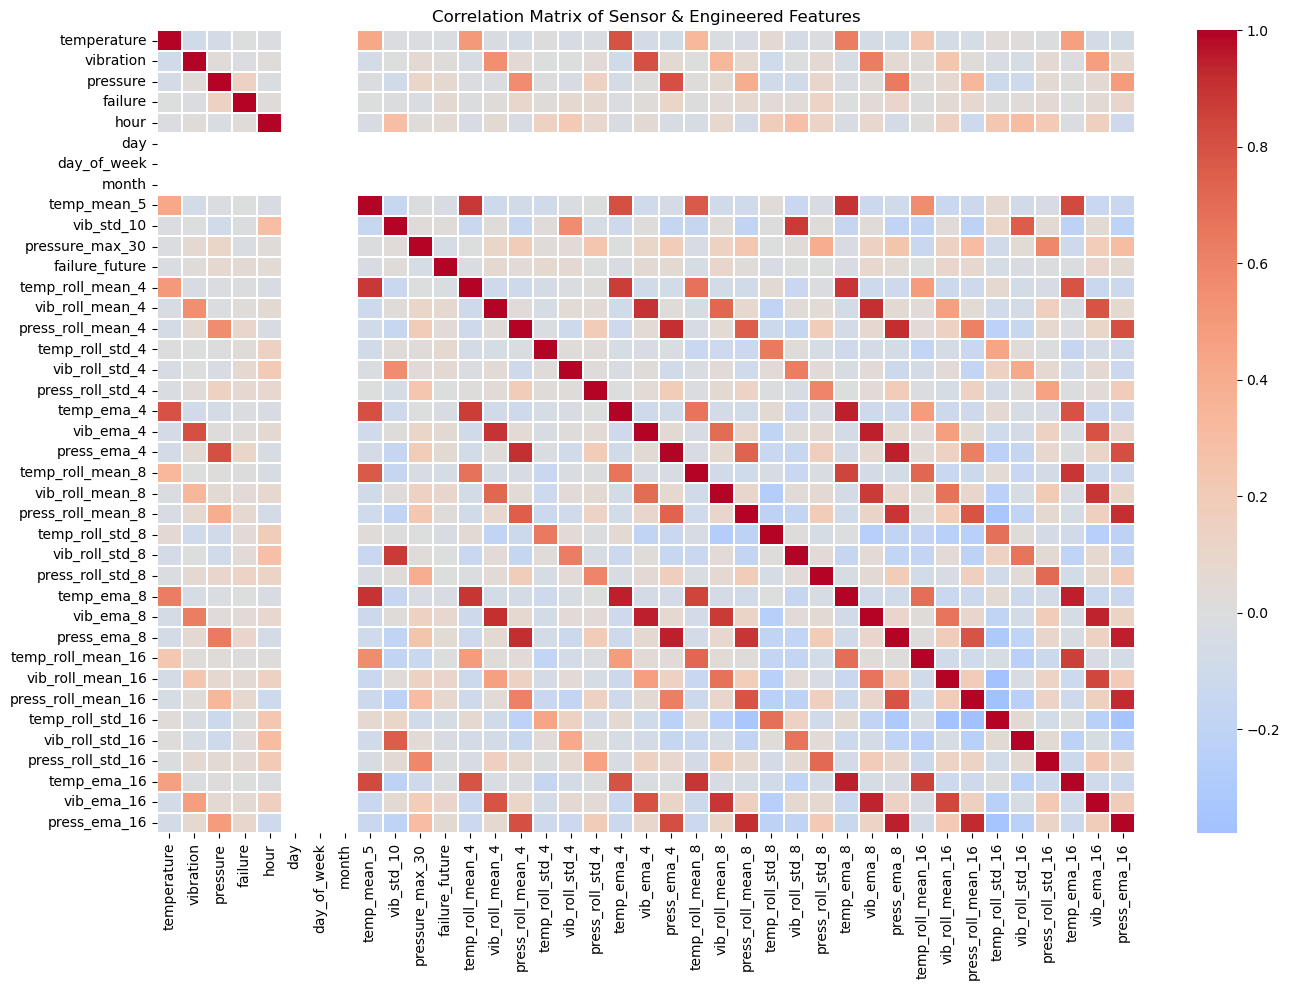

In [10]:
# select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# compute correlation matrix
corr_matrix = numeric_df.corr()

# plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    linewidths=0.3
)
plt.title("Correlation Matrix of Sensor & Engineered Features")
plt.tight_layout()
plt.show()


### Correlation Analysis - Observations

The correlation matrix highlights meaningful relationships between sensor readings, engineered temporal features, and failure events.

Temperature and vibration-based rolling statistics show stronger correlation with failure, indicating gradual degradation patterns prior to breakdowns. Lag features (t-1, t-2) are highly correlated with their corresponding current sensor values, confirming temporal dependency in the data.

Some engineered features exhibit inter-correlation, which is expected due to overlapping rolling windows. This does not pose a concern, as tree-based models used in later stages are robust to correlated inputs.

Overall, the correlations align with physical expectations of industrial equipment behavior, validating the quality of the engineered dataset.

